<a href="https://colab.research.google.com/github/fatemehziaei/machine-learning/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first csv file is read from pc

In [39]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
f1=pd.read_csv("Dataset_1_train.csv")
f2=pd.read_csv("Dataset_1_valid.csv")
f3=pd.read_csv("Dataset_1_test.csv")
data_train=f1.to_numpy()
data_valid=f2.to_numpy()
data_test=f3.to_numpy()

Saving Dataset_1_test.csv to Dataset_1_test (2).csv
Saving Dataset_1_train.csv to Dataset_1_train (3).csv
Saving Dataset_1_valid.csv to Dataset_1_valid (2).csv


here, first the number of train data is read, then linear regression coeefficient w0 and w1 is computed using formula

In [40]:
import numpy as np
n=len(data_train) # the number of data is determinded
xi=np.sum(data_train[:,0]) # x data is summed
yi=np.sum(data_train[:,1]) # y data is summed
xi2=np.sum(data_train[:,0]**2) # summation xi*xi is calculated
xiyi=np.sum(data_train[:,0]*data_train[:,1]) # summation xi*yi is calculated
w1=(n*xiyi-xi*yi)/(n*xi2-xi**2)
w0=(yi-w1*xi)/n
print(f"w1={w1} and w0={w0}")


w1=10.856006989103017 and w0=-0.9417376148189138


here linear reg. data is plotted with train data, test data and validation data

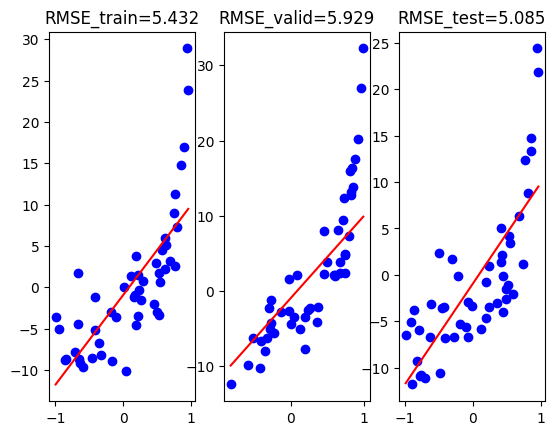

In [41]:
import matplotlib.pyplot as plt
def RMSE(y,y_pred):
  return np.sqrt(np.mean((y_pred-y)**2))
#------train data-------
x_fit=np.linspace(np.min(data_train[:,0]),np.max(data_train[:,0]),n) # x data is generated for lin.reg.
y_fit=w0+w1*x_fit # y_fit to plot lin.reg. is calculated
y_pred=data_train[:,0]*w1+w0 # prediction of y value fot x_train
RMSE_train=RMSE(data_train[:,1],y_pred)
plt.subplot(1,3,1)
plt.plot(x_fit,y_fit,c="r")
plt.scatter(data_train[:,0],data_train[:,1],c="b")
plt.title(f"RMSE_train={round(RMSE_train,3)}")
#-------valid data-----------
n1=len(data_valid)
x_fit1=np.linspace(np.min(data_valid[:,0]),np.max(data_valid[:,0]),n1) # x data is generated for lin.reg.
y_fit1=w0+w1*x_fit1 # prediction of y is calculated
y_pred1=data_valid[:,0]*w1+w0
RMSE_valid=RMSE(data_valid[:,1],y_pred1)
plt.subplot(1,3,2)
plt.plot(x_fit1,y_fit1,c="r")
plt.scatter(data_valid[:,0],data_valid[:,1],c="b")
plt.title(f"RMSE_valid={round(RMSE_valid,3)}")
#------------test data-------------
n2=len(data_test)
x_fit2=np.linspace(np.min(data_test[:,0]),np.max(data_test[:,0]),n1) # x data is generated for lin.reg.
y_fit2=w0+w1*x_fit2 # prediction of y is calculated
y_pred2=data_test[:,0]*w1+w0
RMSE_test=RMSE(data_test[:,1],y_pred2)
plt.subplot(1,3,3)
plt.plot(x_fit2,y_fit2,c="r")
plt.scatter(data_test[:,0],data_test[:,1],c="b")
plt.title(f"RMSE_test={round(RMSE_test,3)}")
plt.show()


calculating RMSE for poly.reg. first calculate w matrix using train data then calculate y_pred for train and valid data and calculate RMSE for train and valid by changing dimention(polynomial degree)

In [58]:
m=7
rmse_valid=np.zeros(m) # construct an array with size of dimention
rmse_train=np.zeros(m)
def X_poly(x,d): # x array is constructed for data according to the polynomial degree(dimention)
  x_poly=np.ones(len(x))
  for i in range (1,d+1):
    x_poly=np.c_[x_poly,x**i]
  return x_poly
def W(x,d,y): # w matrix is constructed
  x_polyt=X_poly(x,d)
  w=np.linalg.inv(x_polyt.T.dot(x_polyt)).dot(x_polyt.T).dot(y)
  return w

for d in range(1,m+1):
  x_polyt=X_poly(data_train[:,0],d) # x for train data
  x_polyv=X_poly(data_valid[:,0],d) # x for valid data
  w=W(data_train[:,0],d,data_train[:,1]) # w using training data
  y_predt=x_polyt.dot(w) # y_pred for x train data
  rmse_train[d-1]=RMSE(data_train[:,1],y_predt) # RMSE for train data
  y_predv=x_polyv.dot(w) # y_pred for x valid data
  rmse_valid[d-1]=RMSE(data_valid[:,1],y_predv) # RMSE for valid data
best=np.argmin(rmse_valid)+1





4


plotting RMSE for valid and train data in each dimention

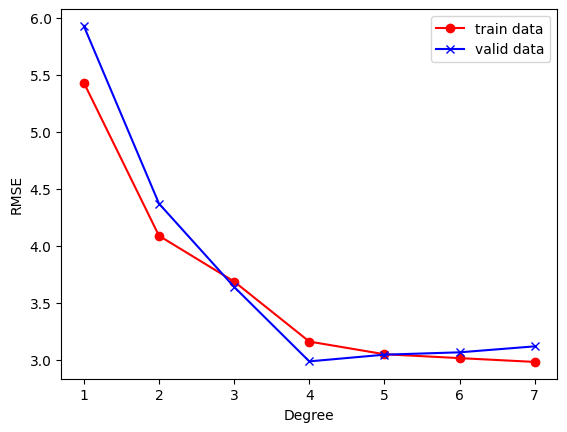

In [52]:
deg=np.linspace(1,m,m)
plt.plot(deg,rmse_train,marker="o",c="r",label="train data")
plt.plot(deg,rmse_valid,marker="x",c="b",label="valid data")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.legend()
plt.show()

ploting poly.reg. with best degree by train, valid and test data

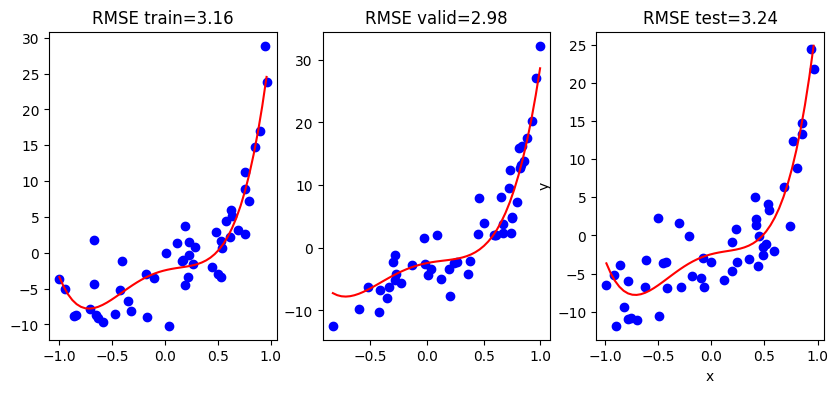

In [77]:
def X_fpoly(x,n): # generate x for polynomial regresion with best degree
  x_fpoly=np.ones(n)
  for i in range(1,best+1):
    x_fpoly=np.c_[x_fpoly,x**i]
  return x_fpoly

#x_polyt=X_poly(data_train[:,0],best) # calling x for best degree
w=W(data_train[:,0],best,data_train[:,1]) # calling w for best degree
y_predte=X_poly(data_test[:,0],best).dot(w) # y_pred for x test data at best degree
rmse_testb=RMSE(data_test[:,1],y_predte) # RMSE for test data at best degree
#------train data-------
x_fitb1=X_fpoly(x_fit,n) # x_fit generate before
y_fitb1=x_fitb1.dot(w) # y_fit to plot lin.reg. is calculated
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))
ax1.plot(x_fit,y_fitb1,c="r")
ax1.scatter(data_train[:,0],data_train[:,1],c="b")
ax1.set_title(f"RMSE train={rmse_train[best-1]:.2f}")
#------valid data-------
x_fitb2=X_fpoly(x_fit1,n1) # x_fit1 generate before
y_fitb2=x_fitb2.dot(w) # y_fit to plot lin.reg. is calculated
ax2.plot(x_fit1,y_fitb2,c="r")
ax2.scatter(data_valid[:,0],data_valid[:,1],c="b")
ax2.set_title(f"RMSE valid={rmse_valid[best-1]:.2f}")
#------test data-------
x_fitb3=X_fpoly(x_fit2,n2) # x_fit2 generate before
y_fitb3=x_fitb3.dot(w) # y_fit to plot lin.reg. is calculated
ax3.plot(x_fit2,y_fitb3,c="r")
ax3.scatter(data_test[:,0],data_test[:,1],c="b")
ax3.set_title(f"RMSE test={rmse_testb:.2f}")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.show()